In [1]:
using Pkg
Pkg.add("Distributions")

   Updating registry at `~/.julia/registries/General`
┌ Warning: could not download https://pkg.julialang.org/registries
└ @ Pkg.Types /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Pkg/src/Types.jl:951
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
using Plots, Match, Distributions

In [14]:
import Base: +, -, *, length, iterate

struct Point{T <: Number}
    x::T
    y::T
end

function -(p1::Point, p2::Point)
    Point(p1.x - p2.x, p1.y - p2.y)
end

function +(p1::Point, p2::Point)
    Point(p1.x + p2.x, p1.y + p2.y)
end

function *(p1::Point, p2::Point)
    Point(p1.x * p2.x, p1.y * p2.y)
end

function length(p1::Point)
    2
end

function iterate(p1::Point, state=(p1.x, 0))
    elem, count = state

    if count == 0
        return (elem, (p1.y, count + 1))
    elseif count == 1
        return (elem, (p1.y, count + 1))
    else
        return nothing
    end
end

function to_tuple(p::Point{T})::Tuple{T, T} where T <: Number
    (p.x, p.y)
end

to_tuple (generic function with 1 method)

### 2.4

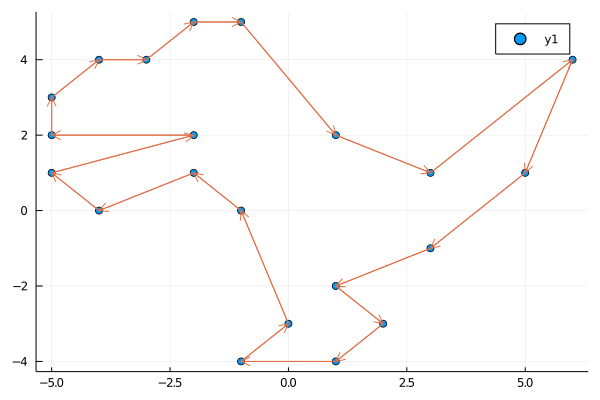

In [15]:
gr()
dino_vectors = [
    Point(6, 4),
    Point(3,1),
    Point(1,2),
    Point(-1,5),
    Point(-2,5),
    Point(-3,4),
    Point(-4,4),
    Point(-5,3),
    Point(-5,2),
    Point(-2,2),
    Point(-5,1),
    Point(-4,0),
    Point(-2,1),
    Point(-1,0),
    Point(0,-3),
    Point(-1,-4),
    Point(1,-4),
    Point(2,-3),
    Point(1,-2),
    Point(3,-1),
    Point(5,1)
]
dino_quivers = [(y - x) for (x, y) in zip(dino_vectors, circshift(dino_vectors, 1))]

dino_tuples = [to_tuple(vec) for vec in dino_vectors]
dino_quiver_tuples = [to_tuple(vec) for vec in dino_quivers]
scatter(dino_tuples)
quiver!(dino_tuples, quiver=dino_quiver_tuples)

### 2.5

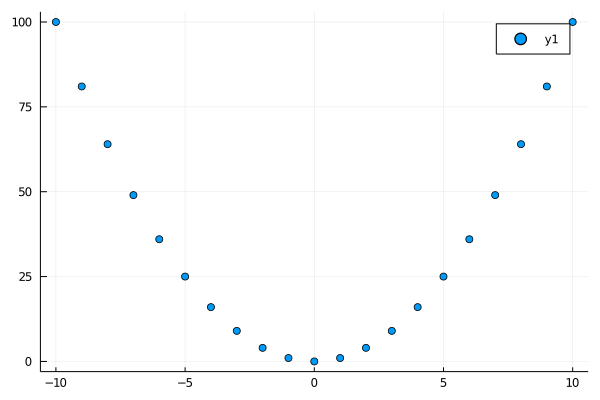

In [16]:
graph = [(x, x^2) for x in -10:10]
scatter(graph)

### 2.7

In [17]:
function add(l::Array{Point{T}, 1})::Point{T} where T <: Number
   reduce((x, y) -> x + y, l, init=Point(0,0)) 
end

add (generic function with 1 method)

In [18]:
add([Point(1,1), Point(2,2), Point(3,3)])

Point{Int64}(6, 6)

### 2.8

In [19]:
function translate(translation::Point{T}, vectors::Array{Point{T}}) where T <: Number
    map(x -> x + translation, vectors)
end

translate (generic function with 1 method)

In [20]:
translate(Point(1,1), [Point(0,0), Point(0,1), Point(-3,-3)])

3-element Array{Point{Int64},1}:
 Point{Int64}(1, 1)
 Point{Int64}(1, 2)
 Point{Int64}(-2, -2)

### 2.11

In [21]:
function get_offset(l::Array{Point{T}}) where T <: Number
    lmin = reduce((p, acc) -> Point(min(p.x, acc.x), min(p.y, acc.y)), l, init=Point(0,0))
    lmax = reduce((p, acc) -> Point(max(p.x, acc.x), max(p.y, acc.y)), l, init=Point(0,0))
    lmax - lmin
end

p_offset = get_offset(dino_vectors)

Point{Int64}(11, 9)

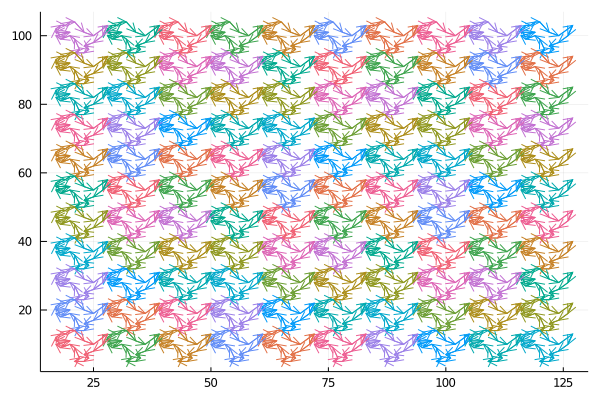

In [22]:
p = scatter()

function add_dinos_to_plot!(x_adj::Int64, y_adj::Int64)
    offset = p_offset * Point(x_adj + 1, y_adj + 1)
    dino_tuples = [to_tuple(vec) for vec in translate(offset, dino_vectors)]
    dino_quiver_tuples = [to_tuple(vec) for vec in dino_quivers]
    quiver!(p, dino_tuples, quiver=dino_quiver_tuples)
end

function plot_dinos(num_x, num_y, curr_y=num_y)
    @match num_x begin
        0 => display(p)
        x => @match curr_y begin
            0 => ( add_dinos_to_plot!(x, curr_y); plot_dinos(x - 1, num_y, num_y) )
            y => ( add_dinos_to_plot!(x, y); plot_dinos(x, num_y, y-1) )
        end
    end
end
            
plot_dinos(10, 10)

### 2.17

In [23]:
function *(p1::Point, x::T) where {T <: Number} 
    Point(p1.x * x, p1.y * x)
end
    
function *(x::T, p1::Point) where {T <: Number}
    Point(p1.x * x, p1.y * x)    
end

* (generic function with 497 methods)

### 2.19

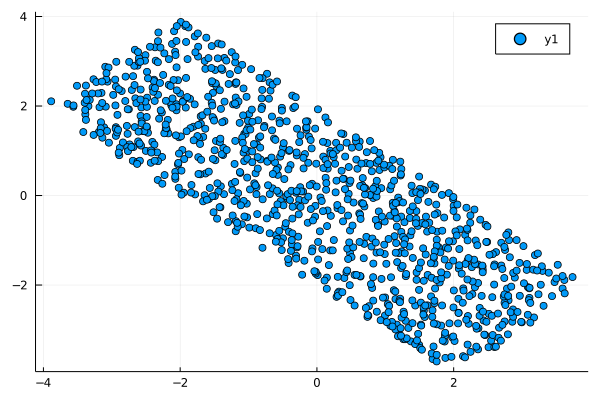

In [26]:
u = Point(-1, 1)
v = Point(1,1)
rs = rand(Uniform(-1.0, 1.0), 1000) .* 3
ss = rand(Uniform(-1.0, 1.0), 1000)

all_points = [u * r for r in rs] .+ [v * s for s in ss]
scatter([to_tuple(pt) for pt in all_points])